In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


### Table of Contents

[Regression](#regression)

[Regression Line](#regression_line)

[Label Encoding](#label_encoding)

[Linear Regression](#linear_regression)

[Evaluation of Regression Efficiency](#eval)

[Correlation Matrix](#correlation_matrix)


<a id="regression"></a>

# What is Regression?

Regression is a method to find out relationship between dependent variable and one or more independent variables. Regression provides the strength of the relationship. 

<a id="regression_line"></a>

# Regression Line

To describe the behaviour of data points we fit a line known as regrssion line. We can do below things with this line:

1. Calculating $R^2$ that is coefficient of determination. $R^2$ is calculating in terms of percentage and shows how many percent data points lie on regrssion line.R is correlation coefficient which shows how much dependent variable is correlated with independent variable/s. 
2. Calculate p-value to determine if $R^2$ is statistically significant or not.
3. Use regression line to predict dependent variable for new values of independent data.

Logistic Regression is similar to Linear Regression except they predict True or False i.e binary unlike continuous values in linear regression.

Logestic Regression fits S shaped logistic function known as sigmoid function. The curve values range in between 0 and 1 that means logistic regrssion provides probability of being True or False.

Because of this behaviour the algorithm used for classification. If probability is more than 50% then True can be predicted otherwise False.

Logistic Regression can be work with discrete and continuous data like logistic regression.
In Linear regression univariate model can be compared with multivariate models but in logistic regrssion univariate models are difficult to compare with multivariate models.

In Logistic Regression we test whether a variables effect in prediction is significantly different than 0 or not. We call it as Wald's test.

In linear regression we fit the model using least squares. That means we find the line which minimise the sum of residual squares. Residuals are used to calculate $R^2$ which is used to compare one model with other models(univariate or multivariate).

Logistic Regression does not have concept of residuals hence no concept of $R^2$. So one model cannot be comparred with other model. It works on maximum likelihood. We calculate the likelihood of being dependent variable True or False given independent variable. Similarly calculate likelihood for all data points and multiply all of them. That's the likelihood given by data points. Then we shift the curve and get another likelihood and eventually select the curve with maximum likelihood.

In [4]:
# Load data

insurance = pd.read_csv('../input/insurance/insurance.csv')

In [ ]:
insurance.head()

<a id="label_encoding"></a>

# Label Encoding
Label encoding is used to convert columns with string or textual values to numeric values. Label encoding take all the unique values of a column and label them from 0 to 1 and replace column values respectively.

In [5]:
# Label three tectual column values to numbers in range 0 to number of unique values.

ins = insurance.copy()
ins.loc[:,['sex', 'smoker', 'region']] = ins.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


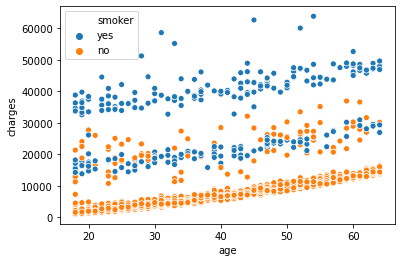

In [6]:
sns.scatterplot(insurance.age, insurance.charges, hue = insurance.smoker)

In [7]:
x = ins.drop('charges', axis=1)
y = ins.charges

<a id="linear_regression"></a>

# Linear Regression

Linear regression is used for regression problems where model is supposed to predict continuous value. Like in below example model is supposed to predict medical charges for a patient based on given parameters.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_pred = linreg.predict(x_test)
print(linreg.coef_)

[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [9]:
linreg.intercept_

-11661.98390882441

<a id="eval"></a>

# Evaluation of Regression model efficiency

$$ Mean Absolute Error = \frac{1}{n} \sum_{i=1}^n |Actual \ value - Predicted \ value|
$$

MAE does not consider for direction. Even negative values are considered as positive.
MAE does not penalise large errors.
MAE can be used where change in error is in propotinate to the impact. Like in financial domain if error increses from 3 to 6 then the it is like double the error of actual. But in MSE it will 36 times more in comparision to 3 times error as square of 6 is 36.

MAE can be used if data has outliers. Outlier does not impact much on the result.

$$ Mean Squared Error = \frac{1}{n} \sum_{i=1}^n (Actual \ value - Predicted \ value)^2
$$

MSE is highly biased for higher values and can give better understanding for higher values.
MSE penalise large errors.

$$ Root Mean Square Error = \sqrt {\frac{1}{n} \sum_{i=1}^n (Actual \ value - Predicted \ value)^2} $$

We take square root to bring the values on same scale of target values.

RMSE can handle higher values as well as lower values. It is more preferred from others.
RMSE penalise large errors.
RMSE should be used in domain like medical domain or clinical trials for drug manufacturing where a small change or error can create dispropotionate impact.
If we want to have impact of outliers RMSE can be used.

$$ r^2 = 1 \ - \ \frac{\sum_{i=1}^n(Actual \ value - Predicted \ value)^2} {\sum_{i=1}^n(Actual \ value - Mean \ of \ y)^2} $$

In [10]:
#model evaluation
r2_lr = r2_score(y_test, linreg_pred)
mae_lr = mean_absolute_error(y_test, linreg_pred)
mse_lr = mean_squared_error(y_test, linreg_pred)
print([r2_lr, mae_lr, mse_lr, np.sqrt(mse_lr)])

[0.7998747145449959, 3930.3332739011394, 31845929.13415943, 5643.219748880902]


40245.286132058536
52590.82939
52590.82939 -4.572902997835627


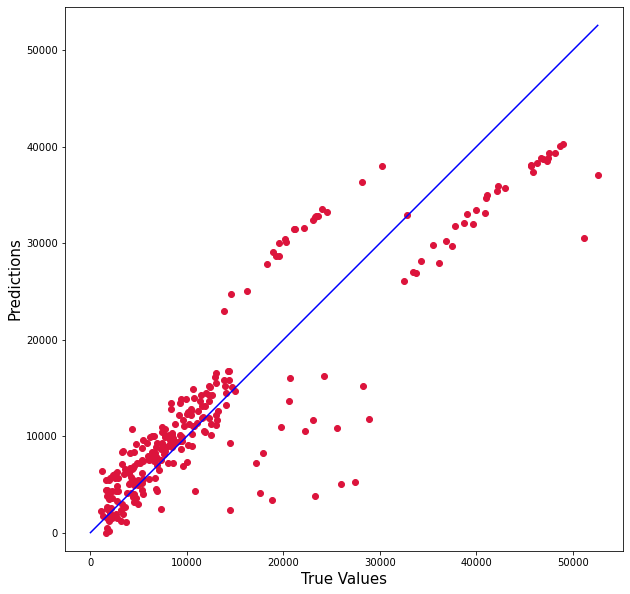

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, linreg_pred, c='crimson')

p1 = max(max(linreg_pred), max(y_test))
p2 = min(min(linreg_pred), min(y_test))
print(max(linreg_pred))
print(max(y_test))
print(p1,p2)
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<a id="correlation_matrix"></a>

# Correlation matrix
Correlation matrix describes visually how two columns are related to each other. If correlation is 1.0 that means columns and highly related with each other i.e. change of one column data will change other column data as well. In below example we can see "Smoker" field is highly correlated with "Charges" field. That means depends on whether person is smoker or not charges will change. As correlation goes close to 0 it shows there is less or no relation between two columns. Like "Age" column has no relation with "Children" column.****

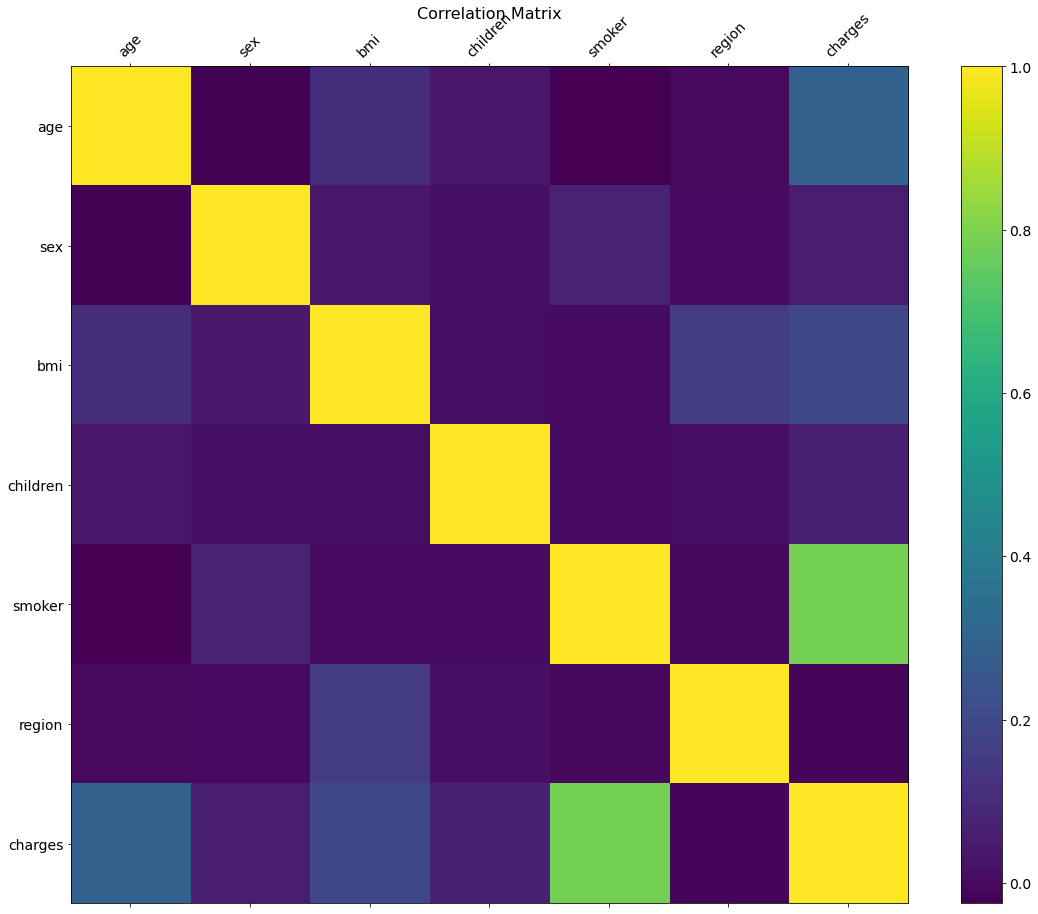

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(ins.corr(), fignum=f.number)
plt.xticks(range(ins.shape[1]), ins.columns, fontsize=14, rotation=45)
plt.yticks(range(ins.shape[1]), ins.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);